![Benjamin Bannekat](NFL_Banner.jpg)

# NFL-Dataset

### NFL Scorigamis – Einzigartige Endstände im American Football
Ein Scorigami in der NFL bezeichnet ein Endergebnis, das in der Geschichte der Liga noch nie vorgekommen ist. Da es in American Football aufgrund der speziellen Punktevergabe (Touchdowns = 6 Punkte, Field Goals = 3 Punkte, Safeties = 2 Punkte, Extrapunkte & Two-Point Conversions) viele mögliche Endstände gibt, entstehen gelegentlich neue, zuvor unerreichte Kombinationen.

Die Spielregeln beeinflussen Scorigamis erheblich, da die unterschiedlichen Punktwerte und mögliche Kombinationen aus Touchdowns, Field Goals und Safeties zu teilweise ungewöhnlichen Ergebnissen führen können. Besonders seltene Ereignisse wie Safeties oder verfehlte Extrapunkte tragen oft dazu bei, neue Scorigamis zu ermöglichen.

Das Konzept wurde von Jon Bois populär gemacht, und es gibt mittlerweile eine Community, die jedes Spiel verfolgt, um zu sehen, ob ein neues Scorigami erzielt wurde.

### Schritt 1: Benötigte Libraries importieren

In [2]:
# Benötigte Libraries

# Webscraping
import csv
import requests
from bs4 import BeautifulSoup
from bs4 import Comment
from time import sleep
from tqdm import tqdm

# Visualisieren
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Schritt 2: Web-Scraping
Es wird nun der Datensatz benötigt, der alle Spiele der NFL jemals beinhaltet. Dazu bietet sich die Website [pro-football-reference.com](https://www.pro-football-reference.com/boxscores/game-scores.htm) an. Sie beinhaltet zunächst alle Endstände sowie ihre Häufigkeit. Mittels `requests` wird die .html-Datei der Seite zunächst heruntergeladen und im Verzeichnis `data/` als `scores.html` gespeichert.

In [1]:
# Datei herunterladen

# URL, die gescraped werden soll
url = "https://www.pro-football-reference.com/boxscores/game-scores.htm"

# Erstelle GET-Request der URL
response = requests.get(url)

# Prüfe, ob Request erfolgreich war
if response.status_code == 200:
    # Speichere Seite in einer HTML-Datei
    with open("data/scores.html", "w", encoding="utf-8") as file:
        file.write(response.text)
    print("Page saved as 'scores.html'")
else:
    print(f"Failed to download page. Status code: {response.status_code}")

Page saved as 'scores.html'


Aus `scores.html` werden nun alle einzelnen Endstände mithilfe von `BeautifulSoup` geparsed und in der Variable `score_list` gespeichert. Basierend auf dieser Liste kann nun auf der o. g. Website auf die Spiele mit jeweiligem Endergebnis zugegriffen werden. Diese Subseiten werden mit dem Namen des Endergebnisses als .html-Datei im Verzeichnis `data/games/` gespeichert. Insgesamt entstehen dabei 1091 .html-Dateien.

In [74]:
# Datei nach Scores Parsen

# If the HTML is saved locally, you can use:
with open("data/scores.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, 'html.parser')

# Initialize an empty dictionary to store the country data
score_list = []

# Find all div elements with class 'col-md-4 country'
for scores in soup.select('table.stats_table tbody tr:not([thead])'):
    score = scores.find("td").text
    score_list.append(score)

# Alle Spiele zu jedem Score finden

for score in tqdm(score_list,desc="Scores herunterladen"):
    i, j = score.split("-")
    url = f"https://www.pro-football-reference.com/boxscores/game_scores_find.cgi?pts_win={i}&pts_lose={j}"

    # Erstelle GET-Request der URL
    response = requests.get(url)

    # Prüfe, ob Request erfolgreich war
    if response.status_code == 200:
        # Speichere Seite in einer HTML-Datei
        with open(f"data/games/{i}-{j}.html", "w", encoding="utf-8") as file:
            file.write(response.text)
    else:
        print(f"Failed to download {i}-{j}.html. Status code: {response.status_code}")

    sleep(.75)

Scores herunterladen: 100%|██████████| 1091/1091 [53:59<00:00,  2.97s/it] 


Jetzt, wo die 1091 .html-Dateien lokal gespeichert sind, können auch sie mit BeautifulSoup geparsed werden. Dabei werden zunächst alle columns übernommen und später bereinigt. Die geparseden Ergebnisse werden in der Variable `games_list` gespeichert, die daraufhin in die Datei `data/games.csv` geschrieben werden. Diese Datei enthält nun alle Spiele der NFL samt Ergebnissen, Team-Namen, Spieltagen und vielen weiteren Statistiken (unbereinigt).

In [145]:
# Alle Spiele
games_list = []

# Alle Spiele in Dateien speichern
for score in tqdm(score_list,desc="Scores kombinieren"):
    i, j = score.split("-")

    # Datei nach jeweiligem Score speichern
    with open(f"data/games/{i}-{j}.html", "r", encoding="utf-8") as file:
        soup = BeautifulSoup(file, 'html.parser')

    # Alle Spiele des jeweiligen Scores
    for games in soup.select('table.stats_table tbody tr:not([thead])'):
        game = games.find_all("td")
        games_list.append([i.text.strip() for i in game])

# In CSV games.csv speichern
with open('data/games.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    fields = ["week", "day", "date", "outcome", "winner", "game_location", "loser", "boxscore", "pts_w", "pts_l", "yards_w", "to_w", "yards_l", "to_l"]

    writer.writerow(fields)
    writer.writerows(games_list)

print("Done!")

Scores kombinieren: 100%|██████████| 1091/1091 [04:20<00:00,  4.19it/s]

Done!


In [109]:
# Datei herunterladen

# URL, die gescraped werden soll
url = "https://www.pro-football-reference.com/teams/index.htm"

# Erstelle GET-Request der URL
response = requests.get(url)

# Prüfe, ob Request erfolgreich war
if response.status_code == 200:
    # Speichere Seite in einer HTML-Datei
    with open("data/teams.html", "w", encoding="utf-8") as file:
        file.write(response.text)
    print("Page saved as 'teams.html'")
else:
    print(f"Failed to download page. Status code: {response.status_code}")

Page saved as 'teams.html'


-------------------------------------

In [137]:
# Datei nach Scores Parsen

with open("data/teams.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, 'html.parser')

all_names = dict()
act_teams = []

cntr = 0

for team in soup.select('table.stats_table#teams_active tbody tr:not([thead])'):
    name = team.find("th").text.strip("*")
    year_min = team.find("td", {"data-stat": "year_min"}).text
    year_max = team.find("td", {"data-stat": "year_max"}).text
    if not len(team.attrs.values()):
        cntr += 1
    if name not in all_names.keys():
        all_names[name] = cntr

    act_teams.append([cntr if name not in all_names.keys() else all_names[name],int(not len(team.attrs.values())),name,year_min,year_max])

inact_teams = []

comments = soup.find_all(string=lambda text: isinstance(text, Comment))

soup = BeautifulSoup(comments[22], 'html.parser')

for team in soup.select('table.stats_table#teams_inactive tbody tr:not([thead])'):
    name = team.find("th").text
    year_min = team.find("td", {"data-stat": "year_min"}).text
    year_max = team.find("td", {"data-stat": "year_max"}).text
    if not len(team.attrs.values()):
        cntr += 1
    if name not in all_names.keys():
        all_names[name] = cntr

    inact_teams.append([cntr if name not in all_names.keys() else all_names[name],int(not len(team.attrs.values())),name,year_min,year_max])

all_teams = act_teams + inact_teams
all_teams = pd.DataFrame(all_teams,columns=["team_id", "is_latest_name", "team_name", "first_year", "last_year"])
all_teams.drop_duplicates(inplace=True, ignore_index=True)

all_teams.to_csv("data/teams.csv",index=False)

# Wichitg zu erwähnen: Das Team "Chi/Pit Cards/Steelers" sowie  "Phi/Pit Eagles/Steelers" wird in diesem Datensatz
# aus Gründen der Übersichtlichkeit lediglich dem ersteren Team seines Namens zugeordnet. Die Auswirkungen davon sind
# gering, denn diese beiden "Gabel-Teams" haben jeweils nur eine einzige Saison (1943 und 1944) gespielt.
print("Done!")

Done!


In [162]:
df_games = pd.read_csv("data/games.csv")
df_teams = pd.read_csv("data/teams.csv")

games_new = []
errors = []

df_games = df_games.drop("boxscore",axis=1)

df_games["game_location"] = df_games["game_location"].fillna(" ")

for index,game in tqdm(enumerate(df_games.values,1),desc=f"Applying Team-IDs to games"):
    try:
        game = ([index] +
                list(game[:4]) +
                [int(df_teams[df_teams["team_id"] == int(((df_teams[df_teams["team_name"] == game[4]])["team_id"]).iloc[0])]["team_id"].iloc[0])] +
                list(game[5]) +
                [int(df_teams[df_teams["team_id"] == int(((df_teams[df_teams["team_name"] == game[6]])["team_id"]).iloc[0])]["team_id"].iloc[0])] +
                list(game[7:]))
        games_new.append(game)
    # Es gibt in der games-CSV Teams, die in der teams-CSV nicht vorkommen.
    # Diese Teams kommen aber alle aus der Saison 1920 und können daher auch ignoriert werden
    except IndexError:
        errors.append(game)
        continue

with open('data/games_cleaned.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    fields = ["game_id","week","day","date","outcome","winner_id","game_location","loser_id","pts_w","pts_l","yards_w","to_w","yards_l","to_l"]
    writer.writerow(fields)
    writer.writerows(games_new)

print(f"Done with {len(errors)} issues!")

Applying Team-IDs to games: 17949it [00:25, 714.14it/s]

Done with 43 issues!


In [161]:
error_teams = set()
for i in errors:
    error_teams.add(i[2])
    # error_teams.add(i[6])
print(len(error_teams))
error_teams
# errors[24]

16


{'1920-09-26',
 '1920-10-03',
 '1920-10-10',
 '1920-10-17',
 '1920-10-24',
 '1920-10-31',
 '1920-11-07',
 '1920-11-11',
 '1920-11-14',
 '1920-11-21',
 '1920-11-25',
 '1920-11-28',
 '1920-12-05',
 '1920-12-11',
 '1920-12-18',
 '1920-12-19'}

-----------------------------

### Datenbereinigung
Im Sinne der Einheitlichkeit müssen wir aktuelle Namen von Teams auf die alten Teamnamen (geänderte Namen) mappen (vgl. https://www.pro-football-reference.com/teams/index.htm).

In [246]:
# Schritt 1: Mapping-Tabelle erstellen
team_name_mapping = {
    'Cleveland Rams': 'Cleveland Browns',
    'Baltimore Ravens': 'Cleveland Browns',
    'Decatur Staleys': 'Chicago Bears', 
    'Chicago Staleys': 'Chicago Bears', 
    'San Diego Chargers': 'Los Angeles Chargers',
    'Dallas Texans': 'Kansas City Chiefs',
    'Baltimore Colts': 'Indianapolis Colts',
    'Cleveland Rams': 'Los Angeles Rams',
    'St. Louis Rams': 'Los Angeles Rams',
    'Washington Redskins': 'Washington Commanders',
    'Boston Redskins': 'Washington Commanders',
    'Washington Football Team': 'Washington Commanders',
    'Boston Braves': 'Washington Commanders',
    'Oakland Raiders': 'Las Vegas Raiders',
    'Los Angeles Raiders': 'Las Vegas Raiders',
    'Chi/Pit Cards/Steelers': 'Arizona Cardinals',
    'Chicago Cardinals': 'Arizona Cardinals',
    'St. Louis Cardinals': 'Arizona Cardinals',
    'Phoenix Cardinals': 'Arizona Cardinals',    
    'Houston Oilers': 'Tennessee Titans',
    'Tennessee Oilers': 'Tennessee Titans',
    'Dayton Triangles': 'Brooklyn Tigers',
    'Brooklyn Dodgers': 'Brooklyn Tigers',
    'New York Titans': 'New York Jets',
    'Phi/Pit Eagles/Steelers': 'Philadelphia Eagles',
    'Pittsburgh Pirates': 'Pittsburgh Steelers',
    'Chi/Pit Cards/Steelers*': 'Pittsburgh Steelers',
    'Phi/Pit Eagles/Steelers*': 'Pittsburgh Steelers',
    'Phi/Pit Eagles/Steelers*': 'Akron Indians',
    'Akron Pros': 'Akron Indians',
    'Pottsville Maroons': 'Boston Bulldogs',
    'Bos/Bkn Yanks/Tigers': 'Boston Yanks',
    'Buffalo Bisons': 'Buffalo Bills',
    'Buffalo All-Americans': 'Buffalo Bills',
    'Buffalo Rangers': 'Buffalo Bills',
    'Chicago Rockets': 'Chicago Hornets',
    'Cleveland Indians': 'Cleveland Bulldogs',
    'Cleveland Tigers': 'Cleveland Bulldogs',
    'Cleveland Tigers': 'Cleveland Bulldogs',
    'Columbus Panhandles': 'Columbus Tigers',
    'Duluth Kelleys': 'Duluth Eskimos',
    'Louisville Brecks': 'Louisville Colonels',
    'New York Bulldogs': 'New York Yanks',
    'Orange Tornadoes': 'Newark Tornadoes',
    'Racine Legion': 'Racine Tornadoes',
}

# Schritt 2: Datensatz laden
df = pd.read_csv('games.csv')

# Schritt 3: Relevante Spalten überprüfen
print("Relevante Spalten:", df[['winner', 'loser']].columns)

# Schritt 4: Ersetzungen vornehmen
df[['winner', 'loser']] = df[['winner', 'loser']].replace(team_name_mapping)

# Schritt 5: Änderungen überprüfen
for old_name in team_name_mapping.keys():
    if df['winner'].str.contains(old_name).any() or df['loser'].str.contains(old_name).any():
        print(f"Der alte Teamname '{old_name}' ist noch vorhanden.")
    else:
        print(f"Der alte Teamname '{old_name}' wurde erfolgreich ersetzt.")

# Schritt 6: Aktualisierten Datensatz speichern
df.to_csv('data/games_new.csv', index=False)

Relevante Spalten: Index(['winner', 'loser'], dtype='object')
Der alte Teamname 'Cleveland Rams' wurde erfolgreich ersetzt.
Der alte Teamname 'Baltimore Ravens' wurde erfolgreich ersetzt.
Der alte Teamname 'Decatur Staleys' wurde erfolgreich ersetzt.
Der alte Teamname 'Chicago Staleys' wurde erfolgreich ersetzt.
Der alte Teamname 'San Diego Chargers' wurde erfolgreich ersetzt.
Der alte Teamname 'Dallas Texans' wurde erfolgreich ersetzt.
Der alte Teamname 'Baltimore Colts' wurde erfolgreich ersetzt.
Der alte Teamname 'St. Louis Rams' wurde erfolgreich ersetzt.
Der alte Teamname 'Washington Redskins' wurde erfolgreich ersetzt.
Der alte Teamname 'Boston Redskins' wurde erfolgreich ersetzt.
Der alte Teamname 'Washington Football Team' wurde erfolgreich ersetzt.
Der alte Teamname 'Boston Braves' wurde erfolgreich ersetzt.
Der alte Teamname 'Oakland Raiders' wurde erfolgreich ersetzt.
Der alte Teamname 'Los Angeles Raiders' wurde erfolgreich ersetzt.
Der alte Teamname 'Chi/Pit Cards/Steelers

### Visualisierungen

Prozent der Siege mit mehr Yards: 64.87%


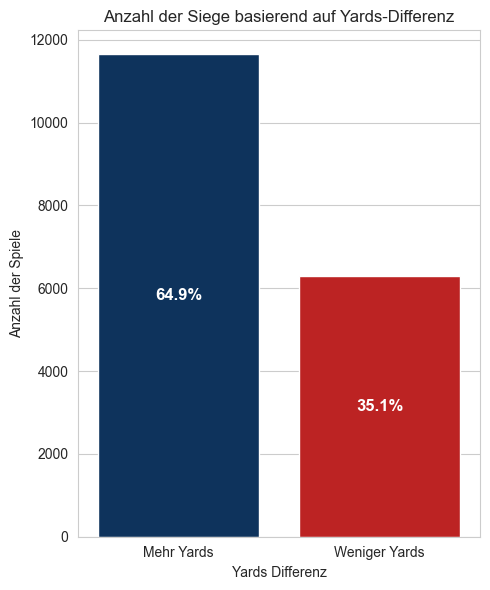

In [254]:
farben = ["#013369", "#d50a0a"]
sns.set_palette(farben)
sns.set_style("whitegrid")

plt.rcParams['font.family'] = 'Arial'

df['yards_greater'] = df['yards_w'] > df['yards_l']
proportion = df['yards_greater'].mean() * 100
print(f"Prozent der Siege mit mehr Yards: {proportion:.2f}%")

yards_counts = df['yards_greater'].value_counts().rename({True: 'Mehr Yards', False: 'Weniger Yards'})

plt.figure(figsize=(5, 6))
ax = sns.barplot(x=yards_counts.index, y=yards_counts.values, hue=yards_counts.index, palette=farben, dodge=False)

for i, v in enumerate(yards_counts.values):
    ax.text(i, v/2, f"{(v/len(df)*100):.1f}%", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.title('Anzahl der Siege basierend auf Yards-Differenz')
plt.xlabel('Yards Differenz')
plt.ylabel('Anzahl der Spiele')
plt.tight_layout()
plt.show()

C:\Users\muell\AppData\Local\Temp\ipykernel_3864\3073837743.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(win_percentage[i] / 2, i, f'{win_percentage[i]:.2f}', va='center', ha='center', color='white', fontsize=10, fontweight='bold')
C:\Users\muell\AppData\Local\Temp\ipykernel_3864\3073837743.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(win_percentage[i] + loss_percentage[i] / 2, i, f'{loss_percentage[i]:.2f}', va='center', ha='center', color='white', fontsize=10, fontweight='bold')


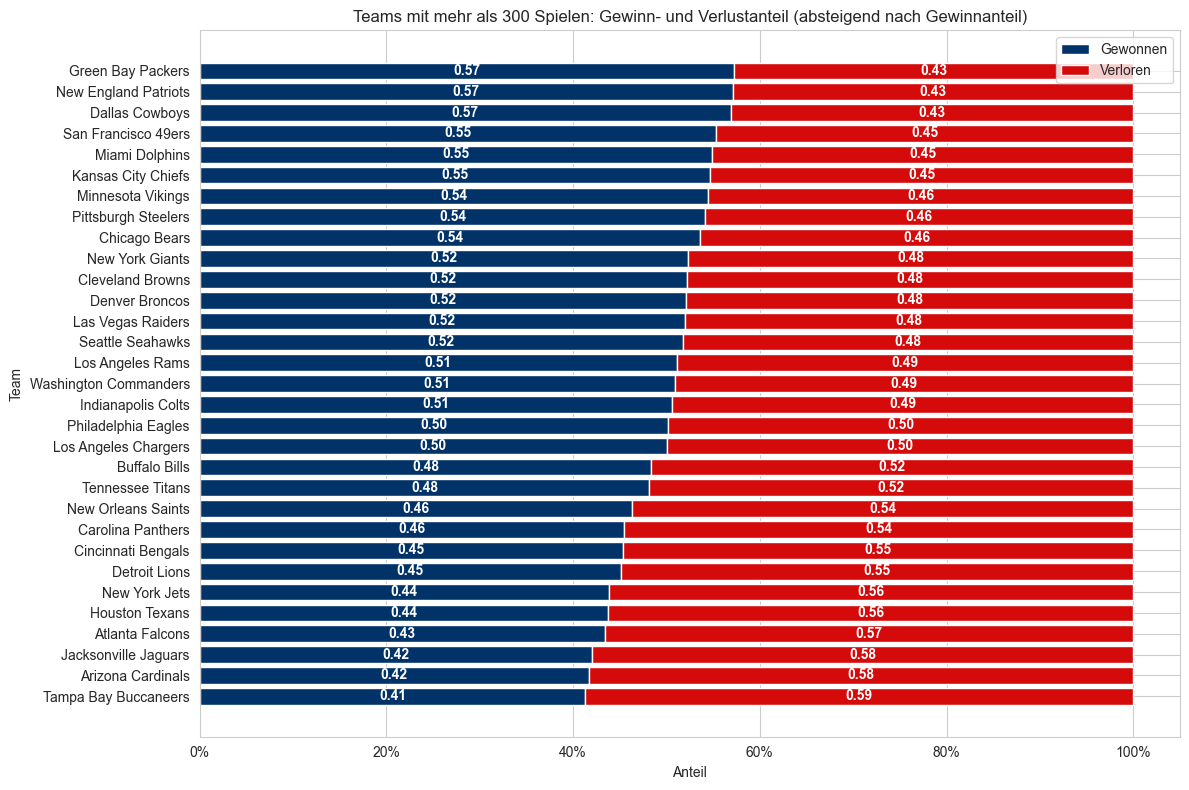

In [252]:
import matplotlib.pyplot as plt

# Zähle, wie oft jedes Team als Gewinner oder Verlierer auftritt
winner_counts = df['winner'].value_counts()
loser_counts = df['loser'].value_counts()

# Berechne die Gesamtanzahl der Spiele für jedes Team
total_games = winner_counts.add(loser_counts, fill_value=0)

# Filtere Teams mit mehr als 300 Spielen
teams_with_300_games = total_games[total_games > 300]

# Berechne den Gewinnanteil (Anzahl der gewonnenen Spiele / Gesamtzahl der Spiele)
win_percentage = winner_counts / total_games
win_percentage = win_percentage[teams_with_300_games.index]  # Nur Teams mit mehr als 300 Spielen

# Berechne den Verlustanteil (1 - Gewinnanteil)
loss_percentage = 1 - win_percentage

# **Sortiere nach Gewinnanteil absteigend**
sorted_teams = win_percentage.sort_values(ascending=True).index
win_percentage = win_percentage[sorted_teams]
loss_percentage = loss_percentage[sorted_teams]

# Visualisierung der Teams mit gestapelten Balken
fig, ax = plt.subplots(figsize=(12, 8))

# Erstelle ein gestapeltes Balkendiagramm
ax.barh(sorted_teams, win_percentage, color='#013369', label='Gewonnen')
ax.barh(sorted_teams, loss_percentage, left=win_percentage, color='#D50A0A', label='Verloren')

# Hinzufügen der Textanzeigen der Anteile
for i, team in enumerate(sorted_teams):
    ax.text(win_percentage[i] / 2, i, f'{win_percentage[i]:.2f}', va='center', ha='center', color='white', fontsize=10, fontweight='bold')
    ax.text(win_percentage[i] + loss_percentage[i] / 2, i, f'{loss_percentage[i]:.2f}', va='center', ha='center', color='white', fontsize=10, fontweight='bold')

# Titel und Achsenbezeichner
plt.title('Teams mit mehr als 300 Spielen: Gewinn- und Verlustanteil (absteigend nach Gewinnanteil)')
plt.xlabel('Anteil')
plt.ylabel('Team')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])


# Legende hinzufügen
plt.legend()

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

### SCORIGAMI

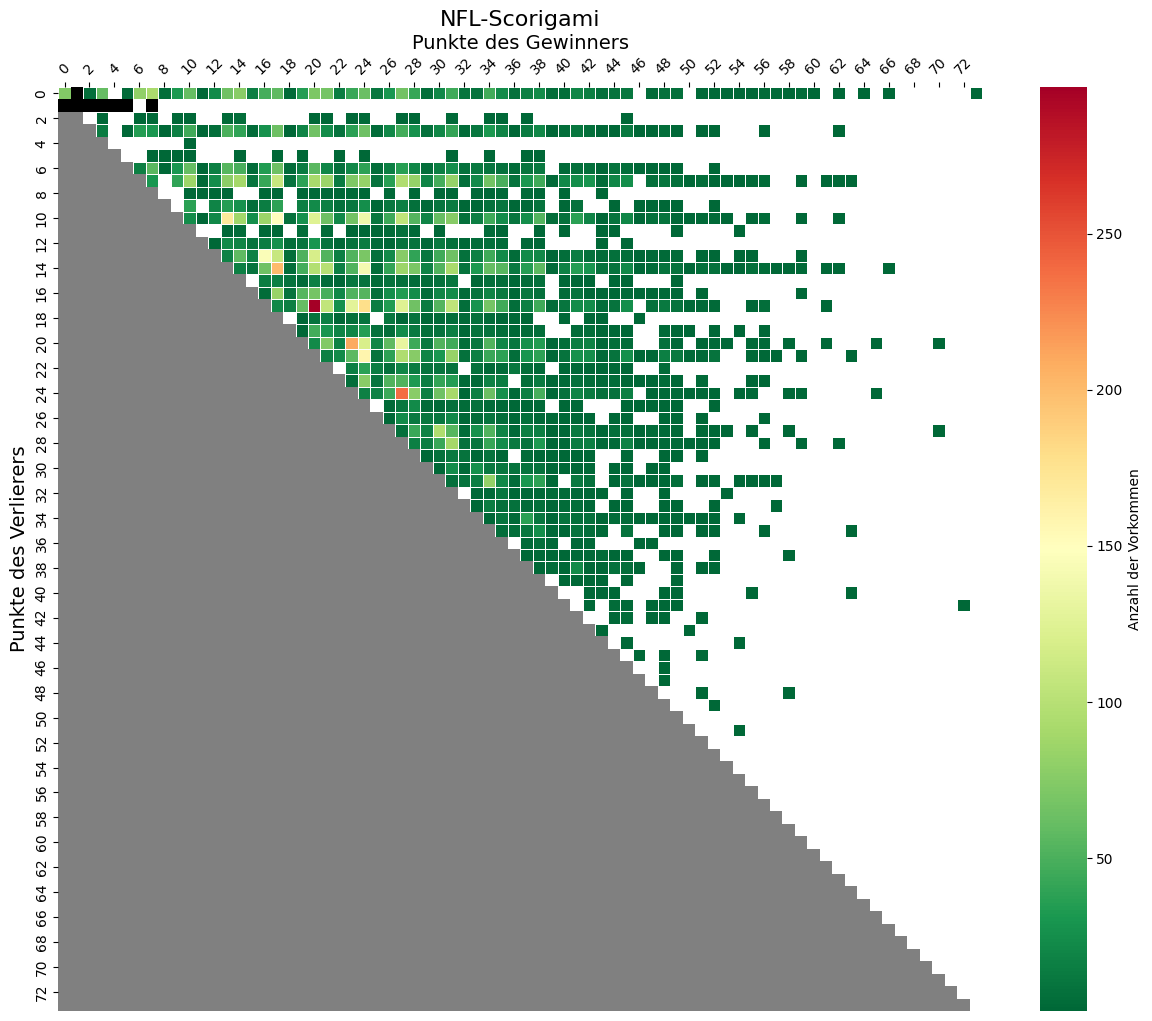

In [3]:
# DataFrame erstellen
games_df = pd.read_csv("data/games_new.csv")
score_counts = games_df.groupby(['pts_w', 'pts_l']).size().reset_index(name='count')
max_points = max(score_counts[['pts_w', 'pts_l']].max()) + 1
heatmap_data = pd.DataFrame(0, index=range(max_points), columns=range(max_points))

# Aggregierte Werte in die Heatmap einfügen
for _, row in score_counts.iterrows():
    heatmap_data.at[int(row['pts_l']), int(row['pts_w'])] = int(row['count'])  # Gewinner & Verlierer vertauscht

# Maske für leere Werte erstellen
mask_missing = heatmap_data == 0  # Maskiere alle Felder mit Wert 0

# Maske für regulär unmögliche Ergebnisse (Verlierer kann nicht mehr Punkte als Gewinner haben)
mask_impossible = np.zeros_like(heatmap_data, dtype=bool)
for loser_points in range(max_points):
    for winner_points in range(max_points):
        if winner_points < loser_points:  # Unmögliches Ergebnis
            mask_impossible[loser_points, winner_points] = True

# Maske für spezielle NFL-Regel-unmögliche Kombinationen
mask_extra_impossible = np.zeros_like(heatmap_data, dtype=bool)
extra_black_combinations = [(1, 7), (1, 5), (1, 4), (1, 3), (1, 2), (1, 1), (1, 0), (0, 1)]
for loser, winner in extra_black_combinations:
    # If-Statement mit ChatGPT generiert
    if loser < max_points and winner < max_points:
        mask_extra_impossible[loser, winner] = True
        heatmap_data.at[loser, winner] = np.nan  # Sicherstellen, dass sie als unmöglich behandelt werden

# Heatmap erstellen
fig, ax = plt.subplots(figsize=(15, 12))

# Normale Heatmap mit weißen Rändern (für gültige Werte)
sns.heatmap(
    heatmap_data,
    mask=mask_missing,  
    cmap=sns.color_palette("RdYlGn_r", as_cmap=True),  
    linewidths=0.5,  
    square=True, 
    cbar=True,  
    cbar_kws={"label": "Anzahl der Vorkommen"}  
)

sns.heatmap(
    np.where(mask_impossible, 1, np.nan),  
    mask=~mask_impossible, 
    cmap=["#808080"],  
    linewidths=0,  # Kein Rand für diese Felder
    square=True,
    cbar=False  # Keine zusätzliche Farbskala
)

# Dunkelgraue Heatmap für spezielle NFL-Regeln (1-7, 1-5, ...)
sns.heatmap(
    np.where(mask_extra_impossible, 1, np.nan),  # Nur spezielle NFL-unmögliche Ergebnisse anzeigen
    mask=~mask_extra_impossible,  # Umgekehrte Maske
    cmap=["#000000"],  # Dunkelgrau für NFL-Regeln
    linewidths=0,  # KEIN RAND FÜR DIESE FELDER
    square=True,
    cbar=False  # Keine zusätzliche Farbskala
)

# Y-Achse nach oben verschieben
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Achsentitel und Layout anpassen
plt.title("NFL-Scorigami", fontsize=16)
plt.xlabel("Punkte des Gewinners", fontsize=14)  # Jetzt Gewinner
plt.ylabel("Punkte des Verlierers", fontsize=14)  # Jetzt Verlierer
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Heatmap anzeigen
plt.show()